# Importing Libraries

In [2]:
! pip install jenkspy

     |████████████████████████████████| 55 kB 1.1 MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=71218 sha256=7894db8c63bd9c7e77dd498f05d7ddc37cfdc3e47739eddefb112f24adf8e440
  Stored in directory: /root/.cache/pip/wheels/d8/d1/42/9bd05164ef706b84674905892f0542f8db6ac4a652473ca7e0
Successfully built jenkspy


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import jenkspy
from scipy.stats import zscore

# Question 2

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/HW1/student.csv', delimiter=';')

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


## Part a

In [4]:
df.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.shape

(649, 33)

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### More Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

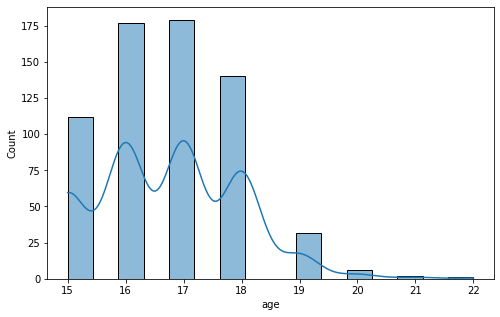

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['age'], kde=True, ax=ax)

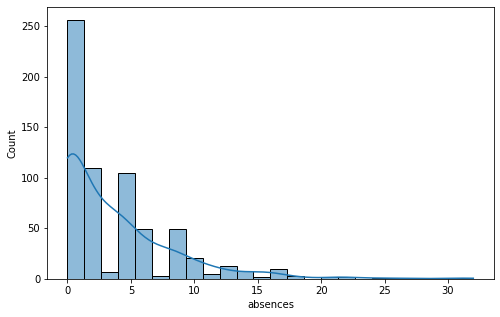

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['absences'], kde=True, ax=ax)

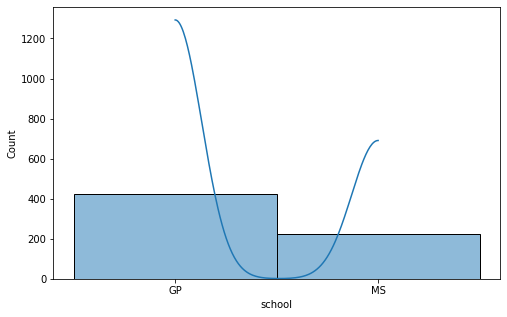

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['school'], kde=True, ax=ax)

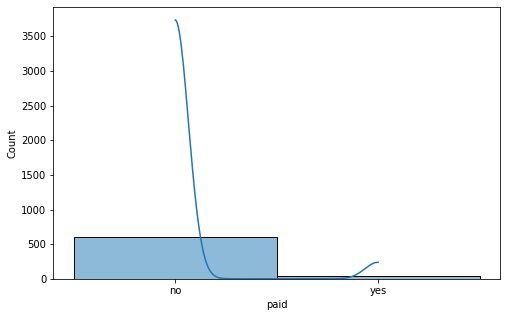

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['paid'], kde=True, ax=ax)

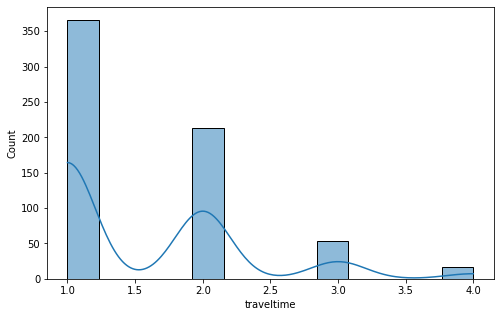

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['traveltime'], kde=True, ax=ax)

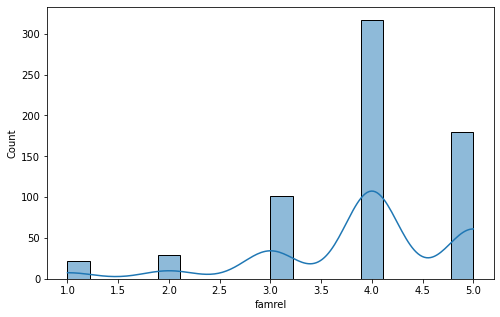

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['famrel'], kde=True, ax=ax)

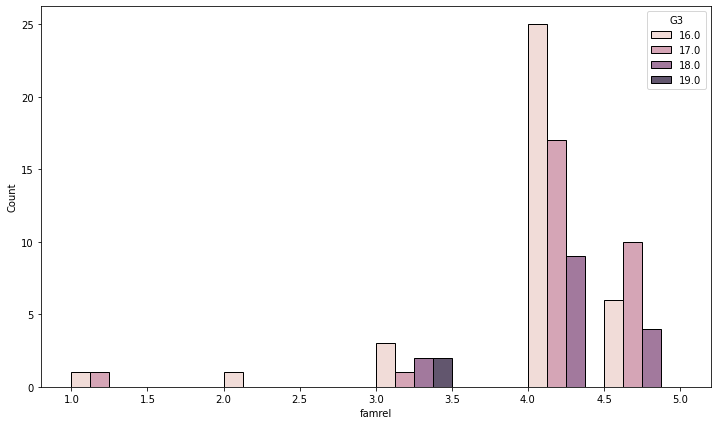

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(df, x=df['famrel'], multiple="dodge", hue=df['G3'][df['G3']>15], ax=ax)

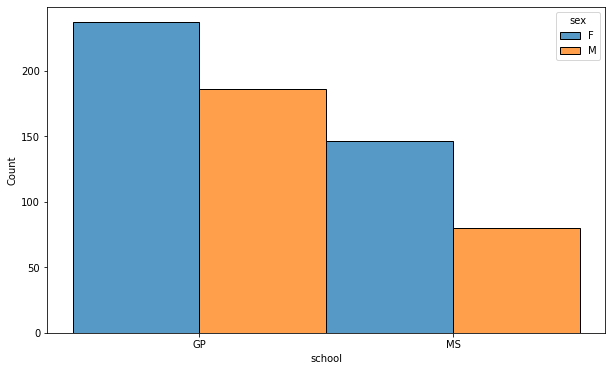

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['sex'], ax=ax)

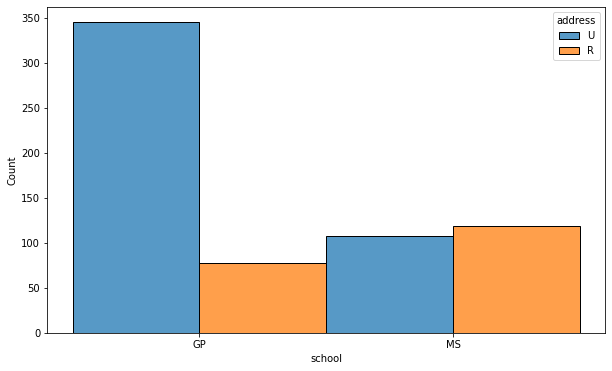

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['address'], ax=ax)

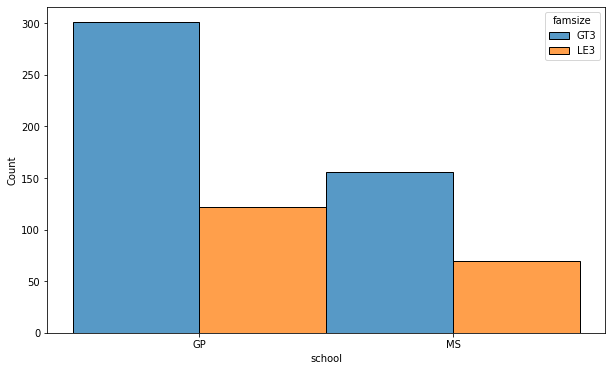

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['famsize'], ax=ax)

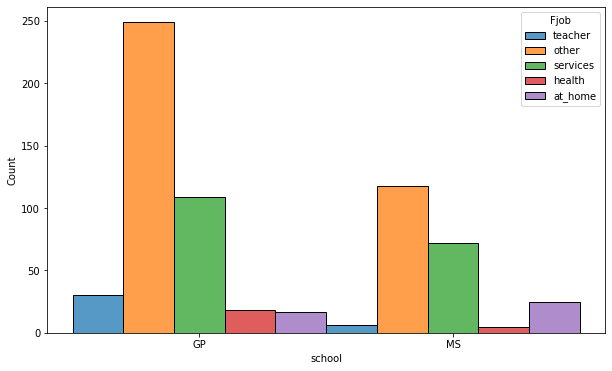

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['Fjob'], ax=ax)

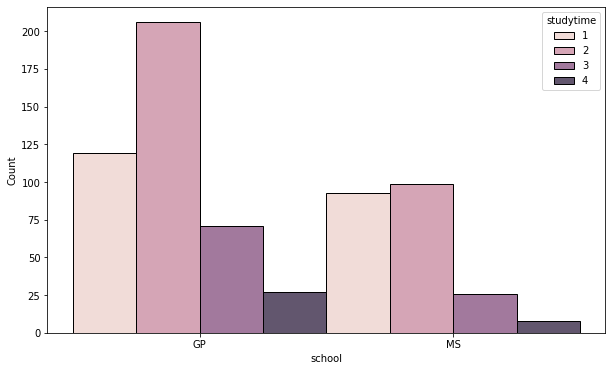

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['school'], multiple="dodge", hue=df['studytime'], ax=ax)

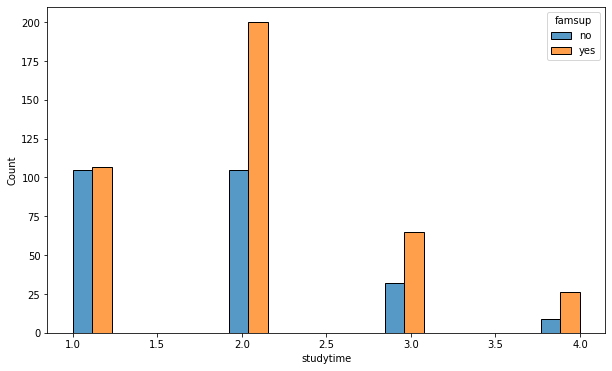

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['studytime'], multiple="dodge", hue=df['famsup'], ax=ax)

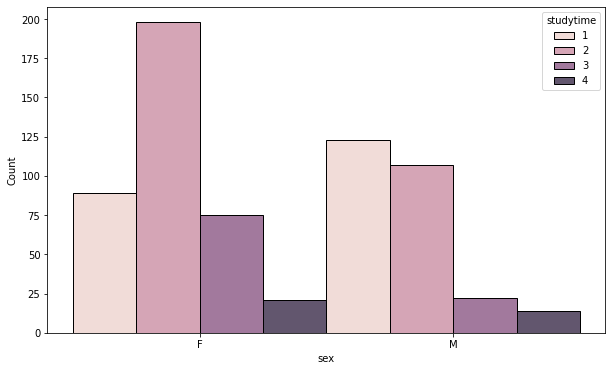

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['sex'], multiple="dodge", hue=df['studytime'], ax=ax)

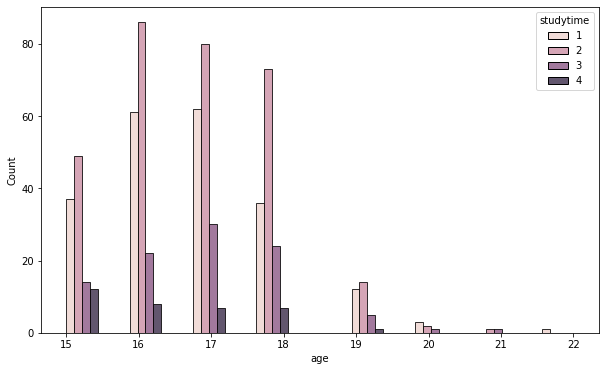

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['age'], multiple="dodge", hue=df['studytime'], ax=ax)

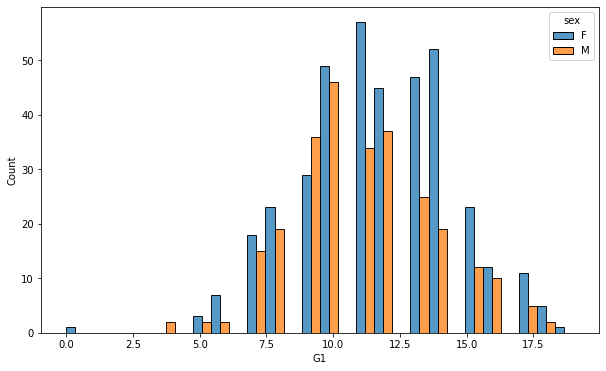

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['G1'], multiple="dodge", hue=df['sex'], ax=ax)

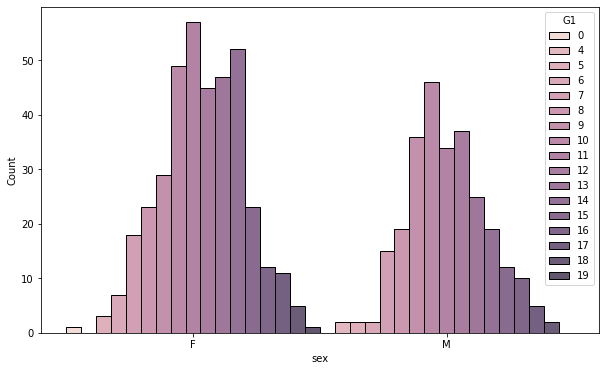

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['sex'], multiple="dodge", hue=df['G1'], ax=ax)

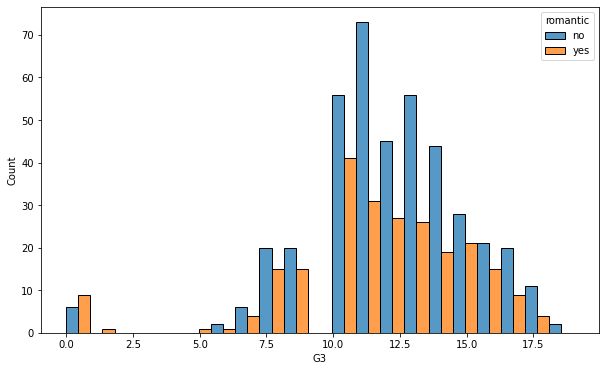

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['G3'], multiple="dodge", hue=df['romantic'], ax=ax)

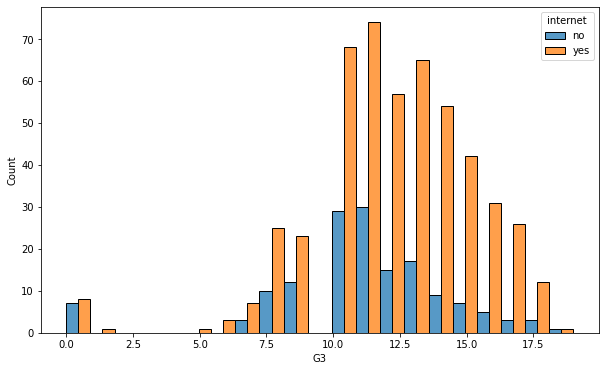

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x=df['G3'], multiple="dodge", hue=df['internet'], ax=ax)

## Part b

In [21]:
df[df.columns[30:33]]

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


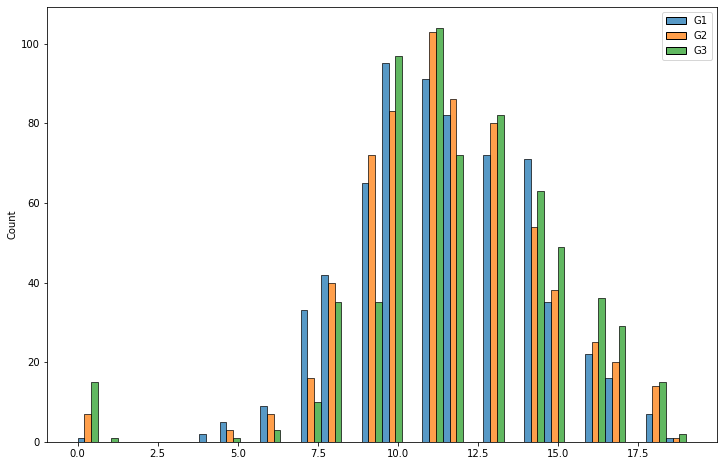

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(df[df.columns[30:33]], ax=ax, multiple="dodge")

## Part c

In [7]:
df['Grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.333333


## Part d

In [10]:
df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [11]:
pd.unique(df['sex'])

array(['F', 'M'], dtype=object)

In [12]:
df['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [14]:
df['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [24]:
df['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

In [25]:
sex_values = dict(df['sex'].value_counts())
internet_values = dict(df['internet'].value_counts())
address_values = dict(df['address'].value_counts())
pstatus_values = dict(df['Pstatus'].value_counts())
reason_values = dict(df['reason'].value_counts())
schoolsup_values = dict(df['schoolsup'].value_counts())

([<matplotlib.patches.Wedge at 0x7eff97083d10>,
 [Text(-0.35557855356893153, -1.0409437507578527, 'no'),
  Text(0.3555785048388379, 1.040943767403685, 'yes')],
 [Text(-0.19395193831032626, -0.5677875004133742, '89.52%'),
  Text(0.1939519117302752, 0.567787509492919, '10.48%')])

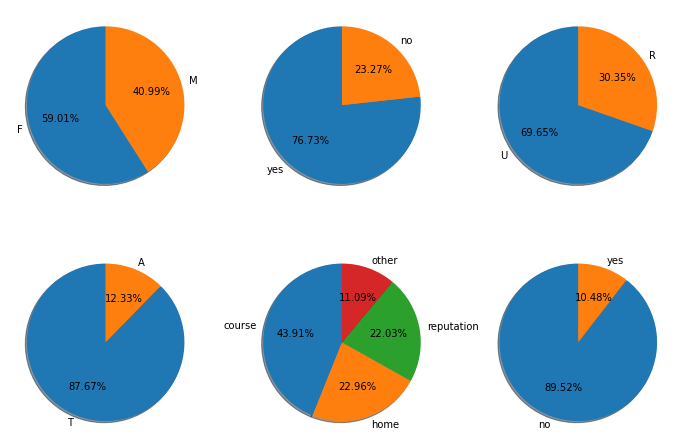

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].pie(sex_values.values(), labels=sex_values.keys(), shadow=True, startangle=90, autopct='%1.2f%%')
axs[0, 1].pie(internet_values.values(), labels=internet_values.keys(),shadow=True, startangle=90,autopct='%1.2f%%')
axs[0, 2].pie(address_values.values(), labels=address_values.keys(),shadow=True, startangle=90, autopct='%1.2f%%')

axs[1, 0].pie(pstatus_values.values(), labels=pstatus_values.keys(), shadow=True, startangle=90, autopct='%1.2f%%')
axs[1, 1].pie(reason_values.values(), labels=reason_values.keys(),shadow=True, startangle=90, autopct='%1.2f%%')
axs[1, 2].pie(schoolsup_values.values(), labels=schoolsup_values.keys(),shadow=True, startangle=90, autopct='%1.2f%%')

## Part e

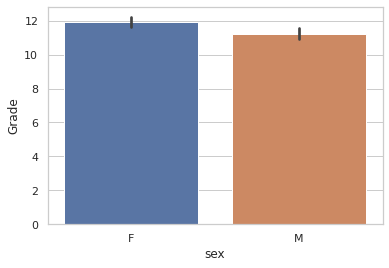

In [71]:
# sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df, x="sex", y="Grade")

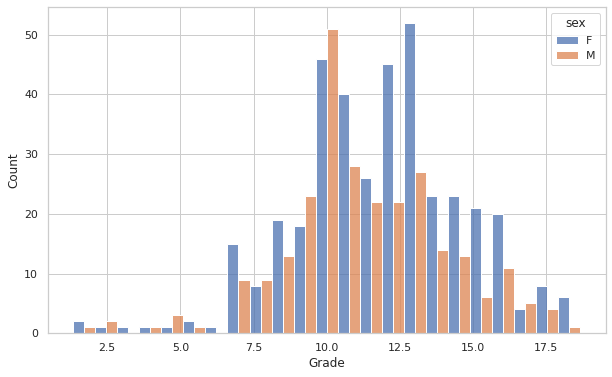

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x = df['Grade'], multiple="dodge", hue=df['sex'], ax=ax)

## Part f

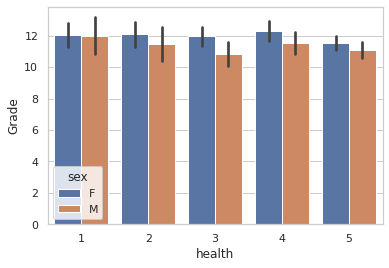

In [76]:
ax = sns.barplot(data=df, x="health", y="Grade", hue="sex")


وضعیت سلامت ، مقادیری بین 1 (بدترین حالت) و 5 (بهترین حالت)
دارد. همانطور که در نمودار بالا مشخص است، در بین دختران، آنهایی که نمره سلامتشان 4 است بیشترین نمرات را کسب کرده اند ولی به طور شگفت انگیزی دخترانی که سلامت آنها 5 بوده است، نمرات پایین تری کسب کرده اند. همچنین در پسران ، افرادی که سلامت کمتری داشته اند، نمرات بیشتری کسب کرده اند.


## Part g

### Cut

In [35]:
df['grade_cut'] = pd.cut(df['Grade'], bins=5, labels=['A', 'B', 'C', 'D', 'E'])

([<matplotlib.patches.Wedge at 0x7eff99913dd0>,
 [Text(-1.0809525399627056, 0.20381758105761003, 'C'),
  Text(0.7539328760065078, -0.8009901488011921, 'D'),
  Text(0.8684847527206285, 0.6750809094410749, 'E'),
  Text(0.36563957833007843, 1.0374525043386817, 'B'),
  Text(0.06386093716111103, 1.0981446993474515, 'A')],
 [Text(-0.5896104763432939, 0.11117322603142364, '44.07%'),
  Text(0.4112361141853679, -0.43690371752792295, '35.90%'),
  Text(0.4737189560294337, 0.36822595060422264, '11.09%'),
  Text(0.19943976999822458, 0.5658831841847355, '7.09%'),
  Text(0.034833238451515106, 0.5989880178258826, '1.85%')])

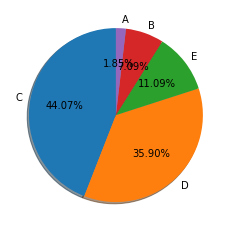

In [36]:
t = dict(df['grade_cut'].value_counts())
plt.pie(t.values(), labels=t.keys(), shadow=True, startangle=90, autopct='%1.2f%%')

### Qcut

In [38]:
df['grade_qcut'] = pd.qcut(df['Grade'], 5, labels=['A', 'B', 'C', 'D', 'E'])

([<matplotlib.patches.Wedge at 0x7eff998c61d0>,
 [Text(-0.7142916117088128, 0.8365330199355114, 'C'),
  Text(-0.9698779987588506, -0.5189765577784099, 'B'),
  Text(0.22210125062743546, -1.0773444363200328, 'A'),
  Text(1.0888035780743386, -0.15654637770487642, 'E'),
  Text(0.585718282478176, 0.9310929564607476, 'D')],
 [Text(-0.3896136063866251, 0.45629073814664256, '22.50%'),
  Text(-0.5290243629593729, -0.2830781224245872, '20.65%'),
  Text(0.12114613670587387, -0.5876424198109269, '20.18%'),
  Text(0.593892860767821, -0.08538893329356895, '18.80%'),
  Text(0.3194826995335505, 0.507868885342226, '17.87%')])

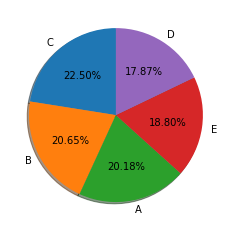

In [39]:
q = dict(df['grade_qcut'].value_counts())
plt.pie(q.values(), labels=q.keys(), shadow=True, startangle=90, autopct='%1.2f%%')

## Part h

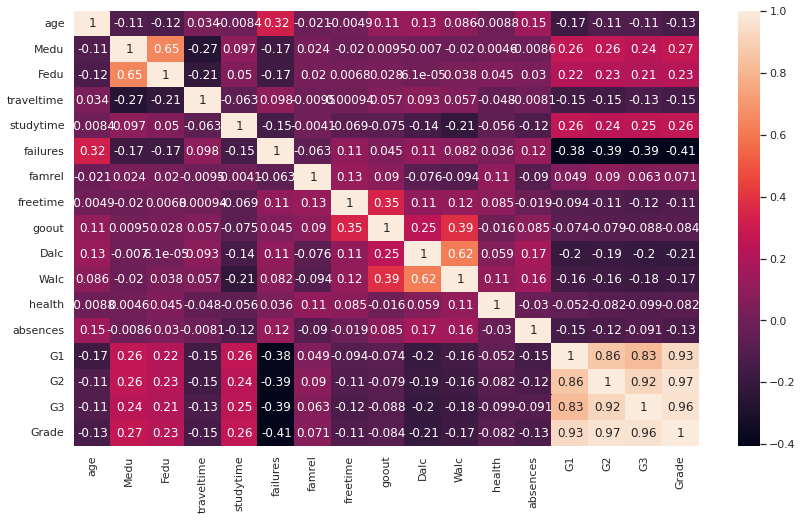

In [82]:
fig, ax = plt.subplots(figsize=(14, 8))
corr = df.corr()
sns.heatmap(corr, annot = True, ax=ax)

دو ویژگی Dalc و Walc نزدیک به هم هستند

# Question 3

## Part a

In [183]:
columns = ['Vendor_name', 'model', 'MCYT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
df_machines = pd.read_csv('/content/drive/MyDrive/Data Mining/HW1/machines.csv', names= columns)

In [184]:
df_machines.reset_index().drop('index', axis=1)

,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256.1,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32.0,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32.0,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32.0,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32.0,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0.0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32.0,2,8,46,50
206,sratus,32,125,2000,8000,0.0,2,14,52,41
207,wang,vs-100,480,512,8000,32.0,0,0,67,47


In [185]:
df_machines = df_machines.reset_index()

In [163]:
df_machines.describe()

,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.206220,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.631453,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.100000,52.000000,176.000000,1150.000000,1238.000000


## Part b

In [7]:
df_machines.dtypes

index           int64
Vendor_name    object
model          object
MCYT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [8]:
df_machines['Vendor_name'] = df_machines['Vendor_name'].astype('string')

In [9]:
df_machines.dtypes

index           int64
Vendor_name    string
model          object
MCYT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

## Part c

In [109]:
df_machines['Vendor_name'].unique()

<StringArray>
[      'amdahl',       'apollo',         'basf',          'bti',
    'burroughs',        'c.r.d',          'cdc',       'cambex',
          'dec',           'dg',    'formation',   'four-phase',
        'gould',           'hp',       'harris',    'honeywell',
          'ibm',          'ipl',     'magnuson',    'microdata',
          'nas',          'ncr',      'nixdorf', 'perkin-elmer',
        'prime',      'siemens',       'sperry',       'sratus',
         'wang']
Length: 29, dtype: string

In [164]:
df_machines['Vendor_name'].value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: Vendor_name, dtype: int64

## Part d

In [165]:
## روش اول
df1 = df_machines[(df_machines['MMIN']>1000) & (df_machines['MMIN']<20000)]
df1 = df1[['Vendor_name', 'model', 'MMIN', 'MMAX', 'PRP', 'ERP']]

In [166]:
## روش دوم
df1_prime = df_machines.loc[(df_machines['MMIN']>1000) & (df_machines['MMIN']< 20000), ['Vendor_name', 'model', 'MMIN', 'MMAX', 'PRP', 'ERP']]

In [167]:
df1.tail(10)

,Vendor_name,model,MMIN,MMAX,PRP,ERP
190.0,siemens,7.880-2,8000,32000,248,275
191.0,siemens,7.881-2,8000,32000,405,382
192.0,sperry,1100/61-h1,2000,8000,70,56
193.0,sperry,1100/81,2000,32000,114,182
194.0,sperry,1100/82,2000,32000,208,227
195.0,sperry,1100/83,2000,32000,307,341
196.0,sperry,1100/84,4000,32000,397,360
197.0,sperry,1100/93,8000,64000,915,919
198.0,sperry,1100/94,8000,64000,1150,978
205.0,sratus,32,2000,8000,52,41


In [168]:
df1_prime.tail(10)

,Vendor_name,model,MMIN,MMAX,PRP,ERP
190.0,siemens,7.880-2,8000,32000,248,275
191.0,siemens,7.881-2,8000,32000,405,382
192.0,sperry,1100/61-h1,2000,8000,70,56
193.0,sperry,1100/81,2000,32000,114,182
194.0,sperry,1100/82,2000,32000,208,227
195.0,sperry,1100/83,2000,32000,307,341
196.0,sperry,1100/84,4000,32000,397,360
197.0,sperry,1100/93,8000,64000,915,919
198.0,sperry,1100/94,8000,64000,1150,978
205.0,sratus,32,2000,8000,52,41


In [34]:
df1.to_csv('/content/drive/MyDrive/Data Mining/HW1/machines_partd.csv')

## Part e

In [ ]:
df_machines.filter(regex='e', axis=1)

In [52]:
df_machines[df_machines['model'].str.match('^b.*')== True]

,index,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
15,15,burroughs,b1955,167,524,2000,8,4,15,19,23
16,16,burroughs,b2900,143,512,5000,0,7,32,28,29
17,17,burroughs,b2925,143,1000,2000,0,5,16,31,22
18,18,burroughs,b4955,110,5000,5000,142,8,64,120,124
19,19,burroughs,b5900,143,1500,6300,0,5,32,30,35
20,20,burroughs,b5920,143,3100,6200,0,5,20,33,39
21,21,burroughs,b6900,143,2300,6200,0,6,64,61,40
22,22,burroughs,b6925,110,3100,6200,0,6,64,76,45


In [65]:
# فکر بیشتر
[itm[0] for itm in df_machines['model'].str.findall('^b.*') if len(itm)>0]

['b1955', 'b2900', 'b2925', 'b4955', 'b5900', 'b5920', 'b6900', 'b6925']

## Part f

In [66]:
df_machines['ERP'].mean()

98.85096153846153

In [67]:
df_machines['ERP'].std()

154.97496104143923

In [68]:
df_machines[df_machines['ERP'] == df_machines['ERP'].max()]

,index,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
8,8,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


## Part g

In [187]:
## تعداد رکورد های هر گروه
df_machines['Vendor_name'].value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: Vendor_name, dtype: int64

### max

In [190]:
df_machines.groupby('Vendor_name').max()

,index,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
Vendor_name,,,,,,,,,,
adviser,NaN,32/60,125,256,6000,256.1,16,128,198,199
amdahl,8.0,580-5880,29,32000,64000,128.0,32,64,1144,1238
apollo,10.0,dn420,400,1000,3500,4.0,1,6,40,24
basf,12.0,7/68,60,4000,16000,65.0,1,8,138,117
bti,14.0,8000,350,512,16000,0.0,4,32,35,64
burroughs,22.0,b6925,167,5000,6300,142.0,8,64,120,124
c.r.d,28.0,universe:68/37,320,512,6000,4.0,1,12,77,28
cambex,42.0,1651-1,50,2000,16000,8.0,3,6,60,74
cdc,37.0,omega:480-iii,64,5240,20970,131.0,12,24,368,138


In [191]:
df_machines.groupby('Vendor_name').max()['ERP']

Vendor_name
adviser          199
amdahl          1238
apollo            24
basf             117
bti               64
burroughs        124
c.r.d             28
cambex            74
cdc              138
dec               54
dg                72
formation         34
four-phase        19
gould            157
harris            53
honeywell        181
hp                54
ibm              361
ipl              128
magnuson          88
microdata         33
nas              603
ncr              281
nixdorf           67
perkin-elmer      64
prime             53
siemens          382
sperry           978
sratus            41
wang              47
Name: ERP, dtype: int64

### min

In [192]:
df_machines.groupby('Vendor_name').min()

,index,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
Vendor_name,,,,,,,,,,
adviser,NaN,32/60,125,256,6000,256.1,16,128,198,199
amdahl,0.0,470v/7,23,8000,16000,32.0,8,16,132,132
apollo,9.0,dn320,400,512,3000,0.0,1,2,38,23
basf,11.0,7/65,50,2000,8000,65.0,1,8,92,70
bti,13.0,5000,200,64,64,0.0,1,4,10,15
burroughs,15.0,b1955,110,512,2000,0.0,4,15,19,22
c.r.d,23.0,68/10-80,320,128,2000,0.0,1,3,23,21
cambex,38.0,1636-1,50,1000,4000,8.0,3,5,26,30
cdc,29.0,cyber:170/750,25,500,2000,8.0,1,4,20,23


In [193]:
df_machines.groupby('Vendor_name').min()['ERP']

Vendor_name
adviser         199
amdahl          132
apollo           23
basf             70
bti              15
burroughs        22
c.r.d            21
cambex           30
cdc              23
dec              18
dg               19
formation        34
four-phase       19
gould            75
harris           18
honeywell        20
hp               18
ibm              15
ipl              30
magnuson         37
microdata        33
nas              29
ncr              19
nixdorf          21
perkin-elmer     24
prime            20
siemens          19
sperry           24
sratus           41
wang             25
Name: ERP, dtype: int64

## Part h

In [70]:
df_machines.corr(method='pearson', min_periods=1)

,index,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
index,1.000000,-0.107011,-0.028398,0.062608,0.113449,0.088574,0.032123,0.028751,0.043115
MCYT,-0.107011,1.000000,-0.337071,-0.379592,-0.340414,-0.300734,-0.255629,-0.306571,-0.287806
MMIN,-0.028398,-0.337071,1.000000,0.757827,0.602788,0.526665,0.293877,0.798310,0.823113
MMAX,0.062608,-0.379592,0.757827,1.000000,0.600680,0.568594,0.562388,0.865576,0.904180
CACH,0.113449,-0.340414,0.602788,0.600680,1.000000,0.588128,0.423550,0.704642,0.687428
CHMIN,0.088574,-0.300734,0.526665,0.568594,0.588128,1.000000,0.541762,0.608841,0.610094
CHMAX,0.032123,-0.255629,0.293877,0.562388,0.423550,0.541762,1.000000,0.621309,0.606281
PRP,0.028751,-0.306571,0.798310,0.865576,0.704642,0.608841,0.621309,1.000000,0.966423
ERP,0.043115,-0.287806,0.823113,0.904180,0.687428,0.610094,0.606281,0.966423,1.000000


# Question 4

## Part b

### روش اول

In [180]:
df_machines['labeled_PRP'] = ['A' if b<=300 else 'B' for b in df_machines.PRP]

### روش دوم

In [178]:
df_machines['labeled_PRP'] = df_machines['PRP']

for i in range(len(df_machines)):
  if df_machines.loc[i, 'PRP'] <= 300:
    df_machines.loc[i, 'labeled_PRP'] = 'A'
  else:
    df_machines.loc[i, 'labeled_PRP'] = 'B'

In [179]:
df_machines

,index,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,labeled_PRP
0,NaN,adviser,32/60,125,256,6000,256.1,16,128,198,199,A
1,0.0,amdahl,470v/7,29,8000,32000,32.0,8,32,269,253,A
2,1.0,amdahl,470v/7a,29,8000,32000,32.0,8,32,220,253,A
3,2.0,amdahl,470v/7b,29,8000,32000,32.0,8,32,172,253,A
4,3.0,amdahl,470v/7c,29,8000,16000,32.0,8,16,132,132,A
...,...,...,...,...,...,...,...,...,...,...,...,...
204,203.0,sperry,80/8,124,1000,8000,0.0,1,8,42,37,A
205,204.0,sperry,90/80-model-3,98,1000,8000,32.0,2,8,46,50,A
206,205.0,sratus,32,125,2000,8000,0.0,2,14,52,41,A
207,206.0,wang,vs-100,480,512,8000,32.0,0,0,67,47,A


## Part c

In [181]:
df_machines['labeled_PRP'].value_counts()

A    192
B     17
Name: labeled_PRP, dtype: int64

با توجه به نتایج بالا، 193 رکورد A بوده و 13 رکورد B هستند . 
بنابراین مشکل imbalance بودن دیتا را داریم.


## Part d

In [56]:
df_majority = df_machines[df_machines['labeled_PRP']=='A']
df_minority = df_machines[df_machines['labeled_PRP']=='B']

df_minority_upsampled = resample(df_minority, replace=True, n_samples=195, random_state=123) 
df_upSampled = pd.concat([df_majority, df_minority_upsampled])
df_upSampled.labeled_PRP.value_counts()

A    195
B    195
Name: labeled_PRP, dtype: int64

## Part e

In [57]:
df_majority = df_machines[df_machines['labeled_PRP']=='A']
df_minority = df_machines[df_machines['labeled_PRP']=='B']

df_majority_downsampled = resample(df_majority, replace=False, n_samples=13, random_state=123) 
df_downSampled = pd.concat([df_majority_downsampled, df_minority]) 
df_downSampled.labeled_PRP.value_counts()

A    13
B    13
Name: labeled_PRP, dtype: int64

# Question 5

## Part a

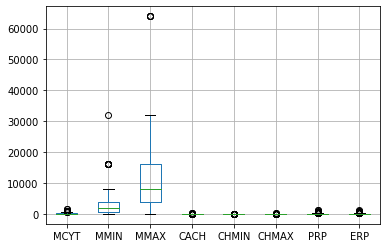

In [15]:
boxplot = df_machines.boxplot(column=['MCYT', 'MMIN', 'MMAX', 'CACH', 'CHMIN','CHMAX','PRP','ERP'])

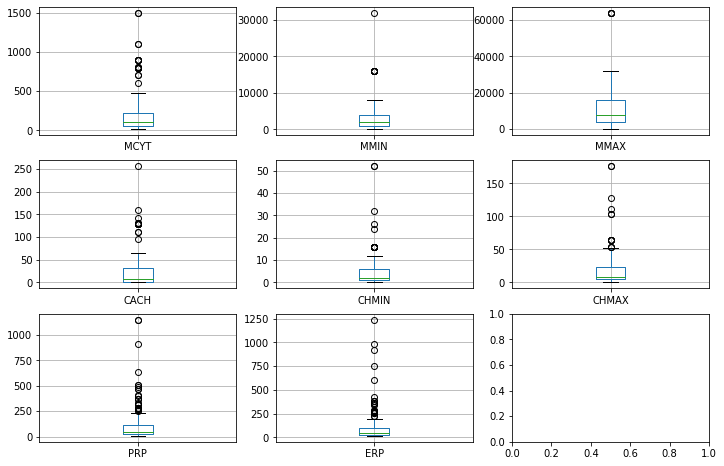

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

df_machines.boxplot('MCYT', ax=axes[0, 0])
df_machines.boxplot('MMIN', ax=axes[0, 1])
df_machines.boxplot('MMAX', ax=axes[0, 2])
df_machines.boxplot('CACH', ax=axes[1, 0])
df_machines.boxplot('CHMIN', ax=axes[1, 1])
df_machines.boxplot('CHMAX', ax=axes[1, 2])
df_machines.boxplot('PRP', ax=axes[2, 0])
df_machines.boxplot('ERP', ax=axes[2, 1])

## Part b

### روش اول

In [99]:
cols = list(df_machines.columns)
cols.remove('Vendor_name')
cols.remove('model')
df_machines[cols]

,index,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,0,29,8000,32000,32,8,32,269,253
1,1,29,8000,32000,32,8,32,220,253
2,2,29,8000,32000,32,8,32,172,253
3,3,29,8000,16000,32,8,16,132,132
4,4,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...
203,203,124,1000,8000,0,1,8,42,37
204,204,98,1000,8000,32,2,8,46,50
205,205,125,2000,8000,0,2,14,52,41
206,206,480,512,8000,32,0,0,67,47


In [100]:
df_machines_new = pd.DataFrame()
for col in cols:
    col_zscore = col + '_zscore'
    df_machines_new[col_zscore] = (df_machines[col] - df_machines[col].mean())/df_machines[col].std(ddof=0)

In [101]:
df_machines_new

,index_zscore,MCYT_zscore,MMIN_zscore,MMAX_zscore,CACH_zscore,CHMIN_zscore,CHMAX_zscore,PRP_zscore,ERP_zscore
0,-1.723744,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,1.019412,0.997070
1,-1.707089,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.714501,0.997070
2,-1.690435,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.415812,0.997070
3,-1.673780,-0.673322,1.321325,0.356323,0.211741,0.495619,-0.070026,0.166905,0.214415
4,-1.657125,-0.684851,1.321325,1.721553,1.069007,0.495619,0.573749,1.324323,1.236395
...,...,...,...,...,...,...,...,...,...
203,1.657125,-0.308226,-0.485364,-0.326291,-0.645526,-0.538223,-0.391913,-0.393136,-0.400066
204,1.673780,-0.408147,-0.485364,-0.326291,0.211741,-0.390531,-0.391913,-0.368245,-0.315979
205,1.690435,-0.304382,-0.227266,-0.326291,-0.645526,-0.390531,-0.150498,-0.330909,-0.374193
206,1.707089,1.059925,-0.611316,-0.326291,0.211741,-0.685914,-0.713801,-0.237569,-0.335384


In [118]:
ls_tmp = [not i for i in list((np.abs(df_machines_new) > 3).any(axis = 1))]

In [119]:
cdf1 = df_machines_new.loc[ls_tmp]

In [120]:
cdf1

,index_zscore,MCYT_zscore,MMIN_zscore,MMAX_zscore,CACH_zscore,CHMIN_zscore,CHMAX_zscore,PRP_zscore,ERP_zscore
0,-1.723744,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,1.019412,0.997070
1,-1.707089,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.714501,0.997070
2,-1.690435,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.415812,0.997070
3,-1.673780,-0.673322,1.321325,0.356323,0.211741,0.495619,-0.070026,0.166905,0.214415
4,-1.657125,-0.684851,1.321325,1.721553,1.069007,0.495619,0.573749,1.324323,1.236395
...,...,...,...,...,...,...,...,...,...
203,1.657125,-0.308226,-0.485364,-0.326291,-0.645526,-0.538223,-0.391913,-0.393136,-0.400066
204,1.673780,-0.408147,-0.485364,-0.326291,0.211741,-0.390531,-0.391913,-0.368245,-0.315979
205,1.690435,-0.304382,-0.227266,-0.326291,-0.645526,-0.390531,-0.150498,-0.330909,-0.374193
206,1.707089,1.059925,-0.611316,-0.326291,0.211741,-0.685914,-0.713801,-0.237569,-0.335384


### روش دوم

In [58]:
cols1 = list(df_machines.columns)
cols1.remove('Vendor_name')
cols1.remove('model')

In [59]:
z_score = zscore(df_machines[cols1])
z_score.shape

(208, 9)

In [62]:
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cdf1 = df_machines[filtered_entries]

In [63]:
cdf1

,index,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...,...
203,203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,205,sratus,32,125,2000,8000,0,2,14,52,41
206,206,wang,vs-100,480,512,8000,32,0,0,67,47


## Part c

In [125]:
Q1 = df_machines.quantile(0.25)
Q3 = df_machines.quantile(0.75)
IQR = Q3 - Q1
IQR

index      103.5
MCYT       175.0
MMIN      3232.0
MMAX     12000.0
CACH        32.0
CHMIN        5.0
CHMAX       19.0
PRP         84.5
ERP         71.5
dtype: float64

In [126]:
cdf2 = df_machines[~((df_machines < (Q1 - 1.5 * IQR)) |(df_machines > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [127]:
cdf2

,index,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
3,3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
9,9,apollo,dn320,400,1000,3000,0,1,2,38,23
10,10,apollo,dn420,400,512,3500,4,1,6,40,24
11,11,basf,7/65,60,2000,8000,65,1,8,92,70
12,12,basf,7/68,50,4000,16000,65,1,8,138,117
...,...,...,...,...,...,...,...,...,...,...,...
203,203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,205,sratus,32,125,2000,8000,0,2,14,52,41
206,206,wang,vs-100,480,512,8000,32,0,0,67,47


# Question 6

## Part a

In [61]:
arr1 = pd.cut(df_machines['CACH'], bins=3, labels=['A', 'B', 'C'])
arr1

0      A
1      A
2      A
3      A
4      A
      ..
203    A
204    A
205    A
206    A
207    A
Name: CACH, Length: 208, dtype: category
Categories (3, object): ['A' < 'B' < 'C']

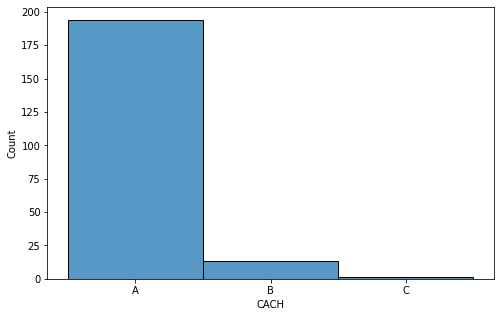

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data= arr1, ax=ax)

## Part b

In [65]:
arr2 = pd.qcut(df_machines['CACH'], 3, labels=['D', 'E', 'F'])
arr2

0      F
1      F
2      F
3      F
4      F
      ..
203    D
204    F
205    D
206    F
207    D
Name: CACH, Length: 208, dtype: category
Categories (3, object): ['D' < 'E' < 'F']

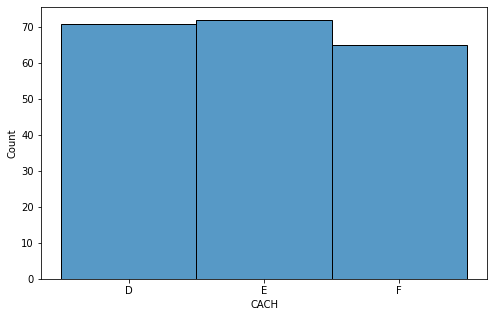

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(arr2, ax=ax)

## Part c

In [75]:
breaks = jenkspy.jenks_breaks(df_machines['CACH'], nb_class=3)

In [77]:
breaks

[0.0, 24.0, 65.0, 256.0]

In [79]:
arr3 = pd.cut(df_machines['CACH'], bins=breaks, labels=['G', 'H', 'I'])

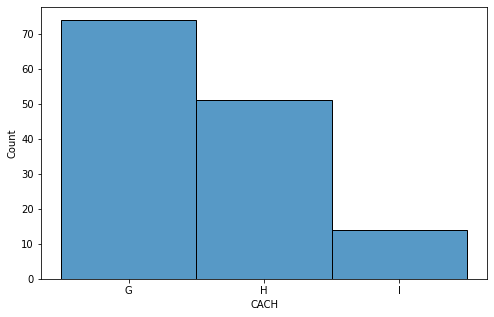

In [80]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(arr3, ax=ax)

# Question 7

## Part a

In [128]:
df_titanic = pd.read_csv('/content/drive/MyDrive/Data Mining/HW1/train.csv')

In [129]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Part b

In [131]:
df_titanic.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


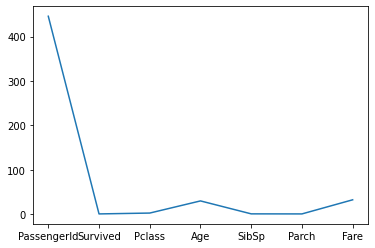

In [134]:
plt.plot(df_titanic.mean())

## Part c

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


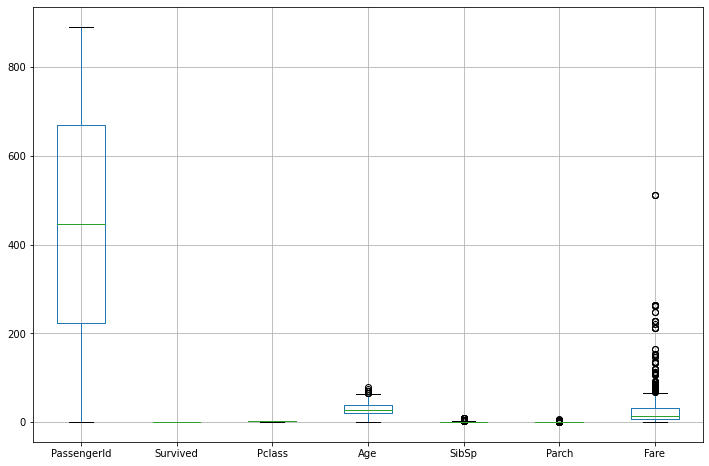

In [137]:
fig , ax = plt.subplots(figsize= (12, 8))
boxplot = df_titanic.boxplot(ax=ax)

## Part d

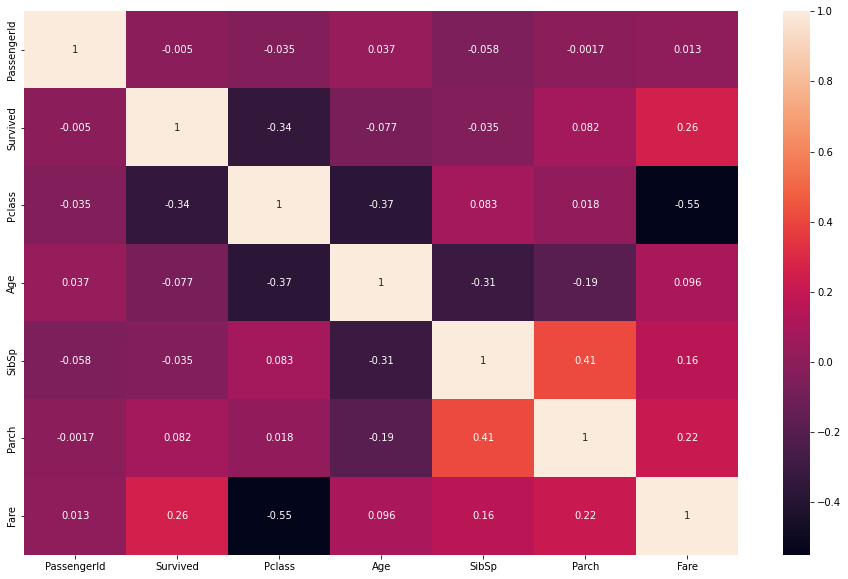

In [138]:
fig, ax = plt.subplots(figsize=(16, 10))
corr1 = df_titanic.corr()
sns.heatmap(corr1, annot = True, ax=ax)

## Part e

In [141]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    

display_missing(df_titanic)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2




## Part f

In [152]:
# df_titanic['alone'] = df_titanic['Age']
df_titanic['alone'] = [True if i==0 else False for i in df_titanic.SibSp]
df_titanic['alone'] = [True if j==0 else False for j in df_titanic.Parch]

In [153]:
df_titanic['alone'].value_counts()

True     678
False    213
Name: alone, dtype: int64

## Part g

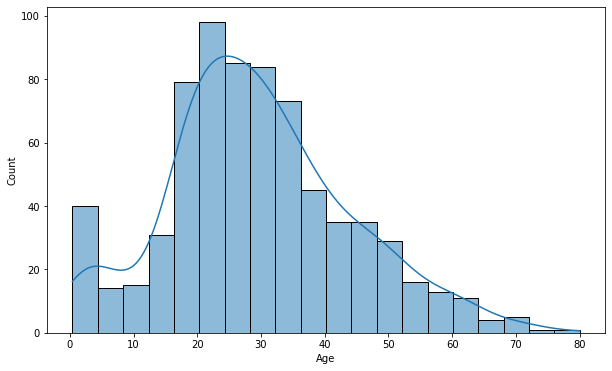

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df_titanic, x=df_titanic['Age'], kde=True, ax=ax)

## Part h

In [147]:
df_titanic["Age"].fillna(df_titanic["Age"].mode(), inplace=True)

## Part j

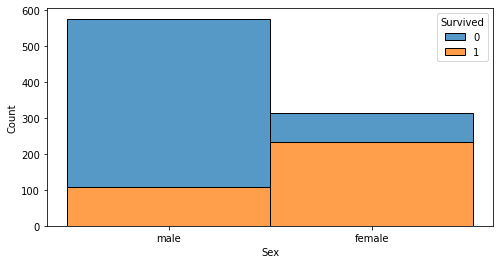

In [94]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(df_titanic, x=df_titanic['Sex'], multiple="stack", hue=df_titanic['Survived'], ax=ax)

## Part k

In [96]:
df_titanic['who'] = df_titanic['Sex']

for i in range(len(df_titanic)):
  if df_titanic.loc[i, 'Age'] < 10:
    df_titanic.loc[i, 'who'] = 'child'
  else:
    df_titanic.loc[i, 'who'] = df_titanic.loc[i, 'Sex']


In [100]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


## Part l

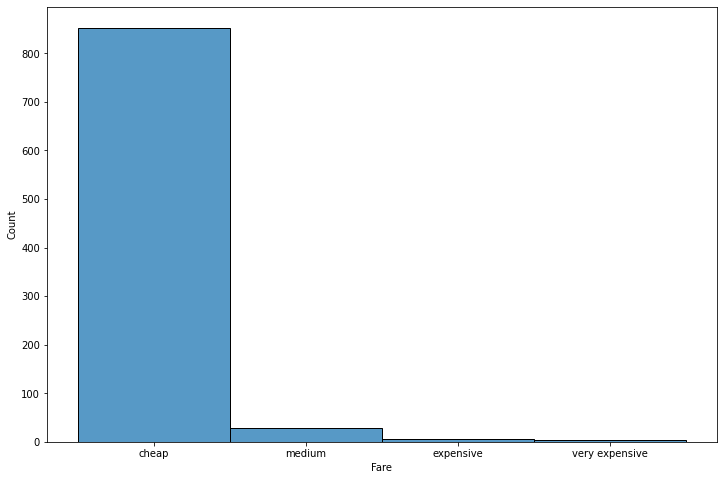

In [144]:
arr1 = pd.cut(df_titanic['Fare'], bins=4, labels=['cheap', 'medium', 'expensive', 'very expensive'])
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data= arr1, ax=ax)